<a href="https://colab.research.google.com/github/DARSHITA2804/DEEPLEARNING/blob/main/ACTIVATIONFUNCTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

x = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])

# Using module
sigmoid = nn.Sigmoid()
print(sigmoid(x))

# Using functional API
print(F.sigmoid(x))   # Deprecated, better to use torch.sigmoid
print(torch.sigmoid(x))


tensor([0.1192, 0.2689, 0.5000, 0.7311, 0.8808])
tensor([0.1192, 0.2689, 0.5000, 0.7311, 0.8808])
tensor([0.1192, 0.2689, 0.5000, 0.7311, 0.8808])


In [ ]:
tanh = nn.Tanh()
print(tanh(x))
print(torch.tanh(x))   # Functional


tensor([-0.9640, -0.7616,  0.0000,  0.7616,  0.9640])
tensor([-0.9640, -0.7616,  0.0000,  0.7616,  0.9640])


In [ ]:
relu = nn.ReLU()
print(relu(x))
print(F.relu(x))


tensor([0., 0., 0., 1., 2.])
tensor([0., 0., 0., 1., 2.])


In [ ]:
leaky_relu = nn.LeakyReLU(negative_slope=0.01)
print(leaky_relu(x))
print(F.leaky_relu(x, negative_slope=0.01))


tensor([-0.0200, -0.0100,  0.0000,  1.0000,  2.0000])
tensor([-0.0200, -0.0100,  0.0000,  1.0000,  2.0000])


In [ ]:
elu = nn.ELU()
print(elu(x))
print(F.elu(x))


tensor([-0.8647, -0.6321,  0.0000,  1.0000,  2.0000])
tensor([-0.8647, -0.6321,  0.0000,  1.0000,  2.0000])


In [ ]:
y = torch.tensor([2.0, 1.0, 0.1])

softmax = nn.Softmax(dim=0)
print(softmax(y))
print(F.softmax(y, dim=0))


tensor([0.6590, 0.2424, 0.0986])
tensor([0.6590, 0.2424, 0.0986])


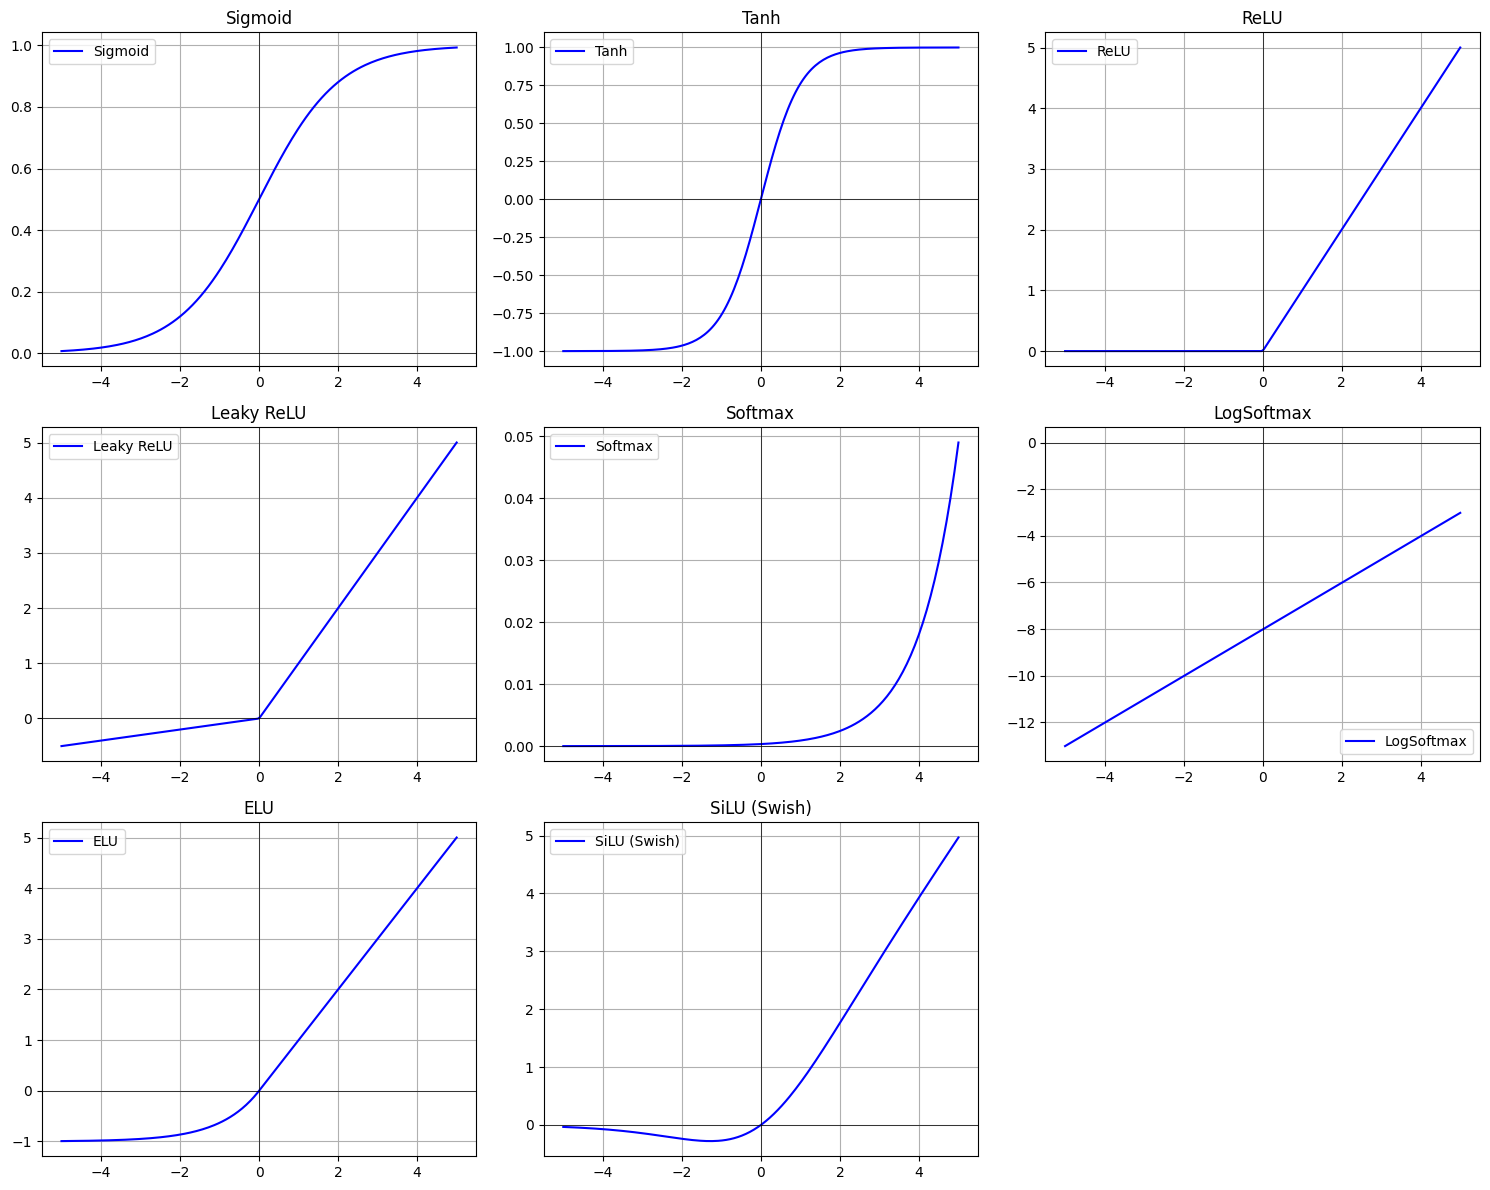

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Input values
x = torch.linspace(-5, 5, 200)

# Activation functions
activations = {
    "Sigmoid": torch.sigmoid(x),
    "Tanh": torch.tanh(x),
    "ReLU": F.relu(x),
    "Leaky ReLU": F.leaky_relu(x, negative_slope=0.1),
    "Softmax": F.softmax(x, dim=0),
    "LogSoftmax": F.log_softmax(x, dim=0),
    "ELU": F.elu(x, alpha=1.0),
    "SiLU (Swish)": F.silu(x)
}

# Plotting
plt.figure(figsize=(15, 12))

for i, (name, y) in enumerate(activations.items(), 1):
    plt.subplot(3, 3, i)
    plt.plot(x.numpy(), y.detach().numpy(), label=name, color="blue")
    plt.title(name)
    plt.axhline(0, color="black", linewidth=0.5)
    plt.axvline(0, color="black", linewidth=0.5)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


100%|██████████| 9.91M/9.91M [00:00<00:00, 33.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.06MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.38MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.18MB/s]



Training with Sigmoid activation...
Test Accuracy (Sigmoid): 97.74%

Training with Tanh activation...
Test Accuracy (Tanh): 97.24%

Training with ReLU activation...
Test Accuracy (ReLU): 97.85%

Training with LeakyReLU activation...
Test Accuracy (LeakyReLU): 97.45%

Training with SiLU activation...
Test Accuracy (SiLU): 97.62%

=== Final Comparison ===
Sigmoid: 97.74%
Tanh: 97.24%
ReLU: 97.85%
LeakyReLU: 97.45%
SiLU: 97.62%


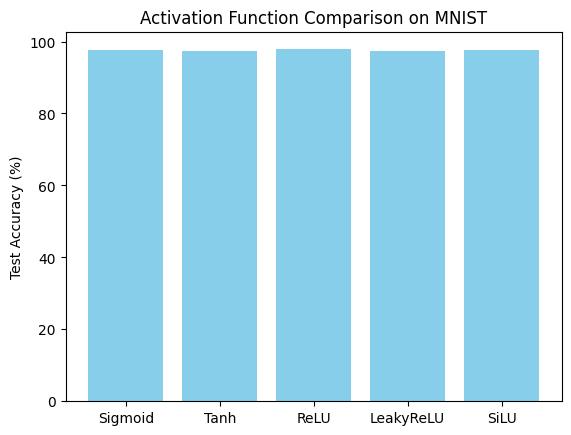

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Model with configurable activation
class SimpleNN(nn.Module):
    def __init__(self, activation_fn):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.activation = activation_fn

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Training function
def train(model, optimizer, criterion, epochs=5):
    model.train()
    for epoch in range(epochs):
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

# Testing function
def test(model):
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1)
            correct += pred.eq(target).sum().item()
    return 100. * correct / len(test_loader.dataset)

# Compare different activations
activations = {
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
    "ReLU": nn.ReLU(),
    "LeakyReLU": nn.LeakyReLU(),
    "SiLU": nn.SiLU()
}

results = {}

for name, act in activations.items():
    print(f"\nTraining with {name} activation...")
    model = SimpleNN(act).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    train(model, optimizer, criterion, epochs=5)
    acc = test(model)
    results[name] = acc
    print(f"Test Accuracy ({name}): {acc:.2f}%")

# Show results
print("\n=== Final Comparison ===")
for k, v in results.items():
    print(f"{k}: {v:.2f}%")

# Plot results
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("Test Accuracy (%)")
plt.title("Activation Function Comparison on MNIST")
plt.show()
